# What is JupyterLab?

- interactive python/R programming env
- use the computationable power from our HPC
- access the HPC data directly

## Common usage

- create a python/R notebook
- create table of content and cell tags
- [navigation] go to my data dir and start analysis
- is my notebook running?
- [some hotkeys](https://gist.github.com/discdiver/9e00618756d120a8c9fa344ac1c375ac)

# Data analysis using Pandas

- read_csv(), head(), sample(), shape(), columns
- df.isnull().any().any()
- sort_values()
- value_counts()
- describe()
- groupby()
- min(),max(),std(),median()
- subset dataframe
- to_csv()


## Example Data: several clinicl measurements of 48 Type 2 diabetes patients and 48 normal individuals

In [22]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/YichaoOU/Data_Science_Tutorials/master/LTC_selected_features.csv",sep=",")

### read data

In [5]:
df.head()

,SampleID,Peptide_27,Fasting_plasma_glucose_(mmol/l),HbA1c,Fasting_plasma_insulin_(pmol/l),C-Peptide_(nmol/l),HOMA-IR,Free_fatty_acids_(mmol/l),Class
0,3,10.42,4.73,6.5,121.4,1.63,3.7,1.03,1
1,5,102.86,7.16,7.6,226.0,1.11,10.4,0.98,1
2,6,9.84,5.06,4.9,39.7,0.75,1.3,0.35,0
3,7,41.03,5.35,6.3,203.3,2.02,7.0,1.17,1
4,8,12.30,5.37,5.6,50.8,1.19,1.7,0.32,0


In [6]:
df.sample(n=3)

,SampleID,Peptide_27,Fasting_plasma_glucose_(mmol/l),HbA1c,Fasting_plasma_insulin_(pmol/l),C-Peptide_(nmol/l),HOMA-IR,Free_fatty_acids_(mmol/l),Class
9,13,27.82,5.67,5.8,79.8,1.27,2.9,0.19,0
88,92,11.74,4.90,5.0,135.3,1.04,4.2,0.28,0
60,64,114.61,18.74,10.5,207.0,1.00,24.8,1.16,1


In [25]:
df.columns

Index(['SampleID', 'Peptide_27', 'Fasting_plasma_glucose_(mmol/l)', 'HbA1c',
       'Fasting_plasma_insulin_(pmol/l)', 'C-Peptide_(nmol/l)', 'HOMA-IR',
       'Free_fatty_acids_(mmol/l)', 'Class'],
      dtype='object')

In [7]:
df.isnull().any().any()

False

### get some statistics from data

In [8]:
df.describe()

,SampleID,Peptide_27,Fasting_plasma_glucose_(mmol/l),HbA1c,Fasting_plasma_insulin_(pmol/l),C-Peptide_(nmol/l),HOMA-IR,Free_fatty_acids_(mmol/l),Class
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,51.541667,33.570208,6.711146,6.248958,155.566667,1.488632,7.240625,0.630937,0.500000
std,27.961596,23.398125,2.734147,1.455515,141.817693,0.778423,7.617384,0.343940,0.502625
min,3.000000,2.630000,3.800000,4.300000,15.000000,0.310000,0.500000,0.150000,0.000000
25%,27.750000,15.597500,5.037500,5.300000,64.550000,0.935000,2.200000,0.340000,0.000000
50%,51.500000,27.280000,5.670000,5.750000,112.600000,1.235000,4.100000,0.550000,0.500000
75%,75.250000,46.885000,7.352500,6.625000,199.775000,1.845000,10.125000,0.940000,1.000000
max,100.000000,114.610000,18.740000,10.900000,783.000000,4.180000,45.300000,1.350000,1.000000


In [9]:
df = df.sort_values("HbA1c",ascending=False)

In [10]:
df.head()

,SampleID,Peptide_27,Fasting_plasma_glucose_(mmol/l),HbA1c,Fasting_plasma_insulin_(pmol/l),C-Peptide_(nmol/l),HOMA-IR,Free_fatty_acids_(mmol/l),Class
55,59,55.81,9.71,10.9,212.0,2.26,13.2,0.39,1
19,23,53.11,8.24,10.8,242.0,2.42,12.8,0.83,1
62,66,23.47,10.13,10.7,143.1,1.02,9.3,0.92,1
60,64,114.61,18.74,10.5,207.0,1.00,24.8,1.16,1
85,89,56.46,9.89,9.1,178.2,0.94,11.3,1.17,1


In [12]:
df.value_counts('Class')

Class
0    48
1    48
dtype: int64

In [13]:
df.shape

(96, 9)

In [14]:
df['HbA1c'].min()

4.3

In [15]:
df['HbA1c'].median()

5.75

In [42]:
df['HbA1c'].max()

10.9

In [16]:
df.groupby('Class').mean()

,SampleID,Peptide_27,Fasting_plasma_glucose_(mmol/l),HbA1c,Fasting_plasma_insulin_(pmol/l),C-Peptide_(nmol/l),HOMA-IR,Free_fatty_acids_(mmol/l)
Class,,,,,,,,
0,53.354167,21.965417,5.321667,5.345833,79.208333,1.103513,2.679167,0.391042
1,49.729167,45.175000,8.100625,7.152083,231.925000,1.873750,11.802083,0.870833


In [21]:
df.groupby('Class').head()

,SampleID,Peptide_27,Fasting_plasma_glucose_(mmol/l),HbA1c,Fasting_plasma_insulin_(pmol/l),C-Peptide_(nmol/l),HOMA-IR,Free_fatty_acids_(mmol/l),Class
55,59,55.81,9.71,10.9,212.0,2.26,13.2,0.39,1
19,23,53.11,8.24,10.8,242.0,2.42,12.8,0.83,1
62,66,23.47,10.13,10.7,143.1,1.02,9.3,0.92,1
60,64,114.61,18.74,10.5,207.0,1.00,24.8,1.16,1
85,89,56.46,9.89,9.1,178.2,0.94,11.3,1.17,1
89,93,18.06,7.39,6.5,88.9,1.22,4.2,0.35,0
65,69,43.86,6.26,6.0,69.2,1.20,2.8,0.22,0
43,47,11.36,6.67,5.9,58.2,0.89,2.5,0.36,0
35,39,32.81,5.68,5.9,102.4,1.03,3.7,0.27,0
6,10,25.75,5.67,5.8,67.1,0.94,2.4,0.26,0


In [41]:
df.groupby('Class').head().to_csv("My_examlpe.tsv",index=False,sep="\t")

### subset data

In [60]:
df_undiagnosed = df[df['HbA1c']<6.5]

In [61]:
df_undiagnosed['Class'].value_counts()

0    47
1    18
Name: Class, dtype: int64

In [62]:
df_undiagnosed['Class'].value_counts(normalize=True)

0    0.723077
1    0.276923
Name: Class, dtype: float64

In [26]:
data2 = "https://raw.githubusercontent.com/YichaoOU/Data_Science_Tutorials/master/newly_diagnosed.csv"

## Exercise

### Read this table as Pandas object

In [36]:
df2 = pd.read_csv(data2,sep=",")

In [38]:
df2.head()

,Sample ID,Peptide 1,Peptide 2,Peptide 3,Peptide 4,Peptide 5,Peptide 6,Peptide 7,Peptide 8,Peptide 9,...,TSH (mU/l),fT3 (pmol/l),fT4 (pmol/l),Cortisol (nmol/l),Testosteron (nmol/l),HOMA-IR,Free fatty acids (mmol/l),RRsys (mmHg),RR dia (mmHg),ssCRP (mg/dl)
0,sample 2,33.58,7.18,9.35,3.57,94.44,14.91,153.05,35.52,9.76,...,0.72,5.23,21.5,NaN,NaN,7.2,0.30,NaN,NaN,0.48
1,sample 3,37.57,8.70,10.79,3.36,94.11,15.99,198.88,39.65,8.62,...,0.97,NaN,NaN,NaN,NaN,9.3,1.04,NaN,NaN,7.15
2,sample 4,27.31,5.42,5.64,2.75,67.01,11.91,148.32,28.90,5.64,...,1.02,5.01,17.6,NaN,NaN,9.1,0.37,NaN,NaN,NaN
3,sample 5,29.09,5.81,4.69,3.61,65.99,12.42,154.55,26.48,6.38,...,1.00,4.61,15.7,NaN,NaN,24.5,0.99,168.0,95.0,0.20
4,sample 6,41.13,8.40,8.85,3.56,109.13,17.60,209.62,44.35,10.43,...,1.30,5.43,19.2,NaN,NaN,11.1,0.54,165.0,84.0,0.30


### What are the features (columns) in this dataset?

In [40]:
df2.columns

Index(['Sample ID', 'Peptide 1', 'Peptide 2', 'Peptide 3', 'Peptide 4',
       'Peptide 5', 'Peptide 6', 'Peptide 7', 'Peptide 8', 'Peptide 9',
       'Peptide 10', 'Peptide 11', 'Peptide 12', 'Peptide 13', 'Peptide 14',
       'Peptide 15', 'Peptide 16', 'Peptide 17', 'Peptide 18', 'Peptide 21',
       'Peptide 22', 'Peptide 23', 'Peptide 24', 'Peptide 25', 'Peptide 26',
       'Peptide 27', 'Peptide 29', 'Peptide 30', 'Age', 'Diagnosis', 'BMI',
       'HbA1c (%)', 'Gender', 'Height', 'Body weight', 'BMI.1', 'Body fat',
       'Fat free mass', 'Waist', 'Hip', 'WHR', 'Hemoglobin', 'Erythrozyten',
       'Thrombozyten', 'Leukocytes', 'ALAT', 'ASAT', 'gGT',
       'Fasting plasma glucose (mmol/l)', 'Fasting plasma insulin (pmol/l)',
       'C-Peptide (nmol/l)', 'Proinsulin (pmol/l)', 'Creatinin',
       'Triglycerides (mmol/l)', 'Cholesterol total (mmol/l)',
       'HDL-Cholesterol (mmol/l)', 'LDL-Cholesterol (mmol/l)',
       'Proteins total (g/l)', 'Albumin (g/l)', 'TSH (mU/l)', 'fT3 (

### What are the maximum and minimum values for HbA1c? Are they the same as the first dataset?

In [45]:
df2['HbA1c (%)'].min()


4.3

In [46]:
df2['HbA1c (%)'].max()

9.7

### Does our data have NaN values?

In [47]:
df2.isnull().any().any()

True

In [52]:
df2[df2.isnull().any(axis=1)] # any rows containing NaN

,Sample ID,Peptide 1,Peptide 2,Peptide 3,Peptide 4,Peptide 5,Peptide 6,Peptide 7,Peptide 8,Peptide 9,...,TSH (mU/l),fT3 (pmol/l),fT4 (pmol/l),Cortisol (nmol/l),Testosteron (nmol/l),HOMA-IR,Free fatty acids (mmol/l),RRsys (mmHg),RR dia (mmHg),ssCRP (mg/dl)
0,sample 2,33.58,7.18,9.35,3.57,94.44,14.91,153.05,35.52,9.76,...,0.72,5.23,21.5,NaN,NaN,7.2,0.30,NaN,NaN,0.48
1,sample 3,37.57,8.70,10.79,3.36,94.11,15.99,198.88,39.65,8.62,...,0.97,NaN,NaN,NaN,NaN,9.3,1.04,NaN,NaN,7.15
2,sample 4,27.31,5.42,5.64,2.75,67.01,11.91,148.32,28.90,5.64,...,1.02,5.01,17.6,NaN,NaN,9.1,0.37,NaN,NaN,NaN
3,sample 5,29.09,5.81,4.69,3.61,65.99,12.42,154.55,26.48,6.38,...,1.00,4.61,15.7,NaN,NaN,24.5,0.99,168.0,95.0,0.20
4,sample 6,41.13,8.40,8.85,3.56,109.13,17.60,209.62,44.35,10.43,...,1.30,5.43,19.2,NaN,NaN,11.1,0.54,165.0,84.0,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Sample 96,26.08,3.54,0.68,0.05,29.46,9.27,142.70,18.61,2.49,...,3.84,NaN,NaN,20.30,117.00,0.8,0.44,130.0,80.0,5.50
92,Sample 97,17.72,2.28,0.64,0.01,19.22,7.37,102.24,13.22,1.61,...,0.63,NaN,NaN,9.73,208.00,5.0,0.36,NaN,NaN,NaN
93,Sample 98,17.70,2.23,0.59,0.01,18.47,5.80,103.94,13.67,1.65,...,1.36,NaN,NaN,9.03,56.00,2.7,0.39,NaN,NaN,NaN
94,Sample 99,26.57,3.33,0.71,0.07,27.69,8.31,137.81,20.68,2.99,...,0.71,NaN,NaN,NaN,1.49,4.6,0.76,NaN,NaN,0.08


In [56]:
df2[df2.columns[df2.isnull().any(axis=0)]] # any columns containing NaN

,Body fat,Fat free mass,Waist,Hip,WHR,Hemoglobin,Erythrozyten,Thrombozyten,Leukocytes,ALAT,...,Proteins total (g/l),Albumin (g/l),TSH (mU/l),fT3 (pmol/l),fT4 (pmol/l),Cortisol (nmol/l),Testosteron (nmol/l),RRsys (mmHg),RR dia (mmHg),ssCRP (mg/dl)
0,32.7,73.4,NaN,NaN,NaN,8.3,4.32,216.0,7.4,0.29,...,70.8,NaN,0.72,5.23,21.5,NaN,NaN,NaN,NaN,0.48
1,33.9,NaN,NaN,NaN,NaN,8.9,5.44,180.0,5.9,1.40,...,NaN,NaN,0.97,NaN,NaN,NaN,NaN,NaN,NaN,7.15
2,33.8,NaN,NaN,NaN,NaN,8.9,4.68,169.0,5.4,0.55,...,66.1,NaN,1.02,5.01,17.6,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,8.5,4.83,237.0,6.6,0.57,...,72.1,NaN,1.00,4.61,15.7,NaN,NaN,168.0,95.0,0.20
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65,...,76.3,NaN,1.30,5.43,19.2,NaN,NaN,165.0,84.0,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,28.0,73.6,NaN,NaN,NaN,10.1,5.28,170.0,8.5,0.65,...,67.9,43.6,3.84,NaN,NaN,20.30,117.00,130.0,80.0,5.50
92,37.9,81.2,NaN,NaN,NaN,7.4,4.18,395.0,10.1,0.30,...,NaN,NaN,0.63,NaN,NaN,9.73,208.00,NaN,NaN,NaN
93,36.8,79.5,NaN,NaN,NaN,9.1,4.76,172.0,7.8,0.43,...,NaN,NaN,1.36,NaN,NaN,9.03,56.00,NaN,NaN,NaN
94,46.9,66.7,135.0,137.0,0.99,8.3,4.84,196.0,5.9,0.43,...,NaN,NaN,0.71,NaN,NaN,NaN,1.49,NaN,NaN,0.08


### How many diabetic patents will be undiagnosed using HbA1c < 6.5?

In [64]:
df2_undiagnosed = df2[df2['HbA1c (%)']<6.5]

In [67]:
df2_undiagnosed['Diagnosis'].value_counts()

NGT    48
T2D    23
Name: Diagnosis, dtype: int64

In [68]:
df2_undiagnosed['Diagnosis'].value_counts(normalize=True)

NGT    0.676056
T2D    0.323944
Name: Diagnosis, dtype: float64

### Save the undiagnosed table as "happy_learning.csv"

# Data visualization using Seaborn and many other libraries

- scatter plot
- barplot
- boxplot
- violin plot
- beeswarm plot

## Scatter plots

In [69]:
import seaborn as sns

In [71]:
df.columns

Index(['SampleID', 'Peptide_27', 'Fasting_plasma_glucose_(mmol/l)', 'HbA1c',
       'Fasting_plasma_insulin_(pmol/l)', 'C-Peptide_(nmol/l)', 'HOMA-IR',
       'Free_fatty_acids_(mmol/l)', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='HbA1c', ylabel='Peptide_27'>

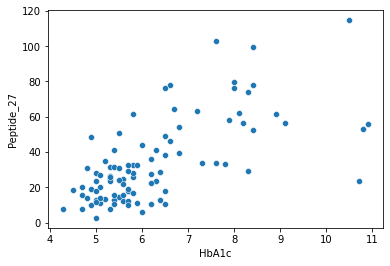

In [72]:
sns.scatterplot(data = df,x="HbA1c",y="Peptide_27")

<AxesSubplot:xlabel='HbA1c', ylabel='Peptide_27'>

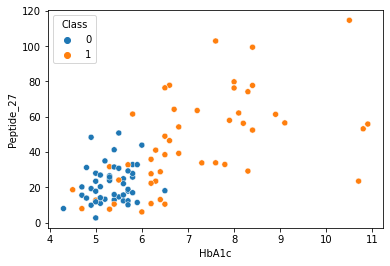

In [73]:
sns.scatterplot(data = df,x="HbA1c",y="Peptide_27",hue="Class")

In [74]:
import matplotlib.pylab as plt

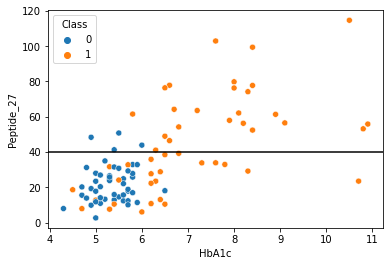

In [76]:
sns.scatterplot(data = df,x="HbA1c",y="Peptide_27",hue="Class")
plt.axhline(40,color="black")

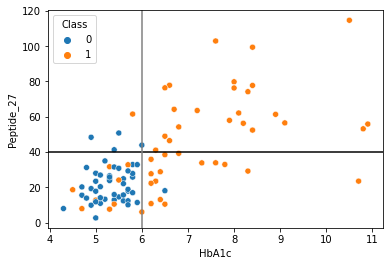

In [78]:
sns.scatterplot(data = df,x="HbA1c",y="Peptide_27",hue="Class")
plt.axhline(40,color="black")
plt.axvline(6,color="grey")

In [124]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe"

In [140]:
df.head()

,SampleID,Peptide_27,Fasting_plasma_glucose_(mmol/l),HbA1c,Fasting_plasma_insulin_(pmol/l),C-Peptide_(nmol/l),HOMA-IR,Free_fatty_acids_(mmol/l),Class
0,3,10.42,4.73,6.5,121.4,1.63,3.7,1.03,1
1,5,102.86,7.16,7.6,226.0,1.11,10.4,0.98,1
2,6,9.84,5.06,4.9,39.7,0.75,1.3,0.35,0
3,7,41.03,5.35,6.3,203.3,2.02,7.0,1.17,1
4,8,12.30,5.37,5.6,50.8,1.19,1.7,0.32,0


### interactive scatter plot

In [142]:
px.scatter(data_frame = df,x="HbA1c",y="Peptide_27",color="Class",hover_data=["SampleID"])


In [79]:
df.describe()

,SampleID,Peptide_27,Fasting_plasma_glucose_(mmol/l),HbA1c,Fasting_plasma_insulin_(pmol/l),C-Peptide_(nmol/l),HOMA-IR,Free_fatty_acids_(mmol/l),Class
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,51.541667,33.570208,6.711146,6.248958,155.566667,1.488632,7.240625,0.630937,0.500000
std,27.961596,23.398125,2.734147,1.455515,141.817693,0.778423,7.617384,0.343940,0.502625
min,3.000000,2.630000,3.800000,4.300000,15.000000,0.310000,0.500000,0.150000,0.000000
25%,27.750000,15.597500,5.037500,5.300000,64.550000,0.935000,2.200000,0.340000,0.000000
50%,51.500000,27.280000,5.670000,5.750000,112.600000,1.235000,4.100000,0.550000,0.500000
75%,75.250000,46.885000,7.352500,6.625000,199.775000,1.845000,10.125000,0.940000,1.000000
max,100.000000,114.610000,18.740000,10.900000,783.000000,4.180000,45.300000,1.350000,1.000000


## barplot

<AxesSubplot:xlabel='variable', ylabel='value'>

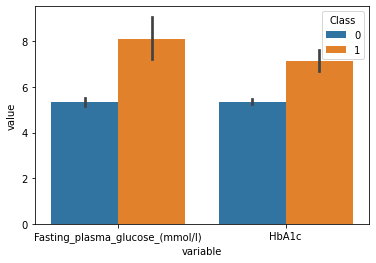

In [83]:
plot_df = df.melt(id_vars=['Class'],value_vars = ['Fasting_plasma_glucose_(mmol/l)','HbA1c'])
sns.barplot(data=plot_df,x="variable",y="value",hue="Class")

In [166]:
df_norm = df/df.max(axis=0)
df_norm.head()

,SampleID,Peptide_27,Fasting_plasma_glucose_(mmol/l),HbA1c,Fasting_plasma_insulin_(pmol/l),C-Peptide_(nmol/l),HOMA-IR,Free_fatty_acids_(mmol/l),Class
0,0.03,0.090917,0.252401,0.596330,0.155045,0.389952,0.081678,0.762963,1.0
1,0.05,0.897478,0.382070,0.697248,0.288633,0.265550,0.229581,0.725926,1.0
2,0.06,0.085856,0.270011,0.449541,0.050702,0.179426,0.028698,0.259259,0.0
3,0.07,0.357997,0.285486,0.577982,0.259642,0.483254,0.154525,0.866667,1.0
4,0.08,0.107320,0.286553,0.513761,0.064879,0.284689,0.037528,0.237037,0.0


<AxesSubplot:xlabel='value', ylabel='variable'>

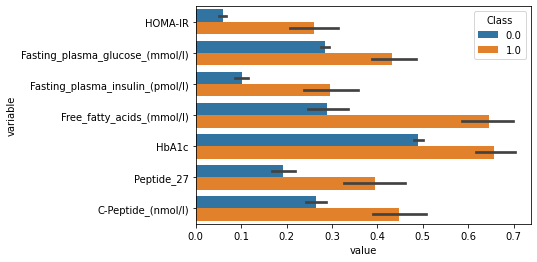

In [175]:
plot_df = df_norm.melt(id_vars=['Class'],value_vars =list(set(df_norm.columns)-set(['Class','SampleID'])) )
sns.barplot(data=plot_df,y="variable",x="value",hue="Class")

## boxplot

<AxesSubplot:xlabel='variable', ylabel='value'>

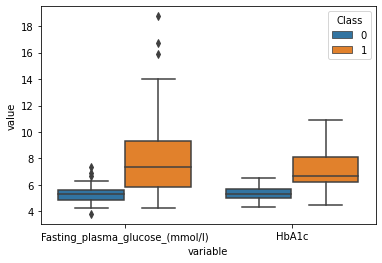

In [84]:
sns.boxplot(data=plot_df,x="variable",y="value",hue="Class")

## Violinplot

<AxesSubplot:xlabel='variable', ylabel='value'>

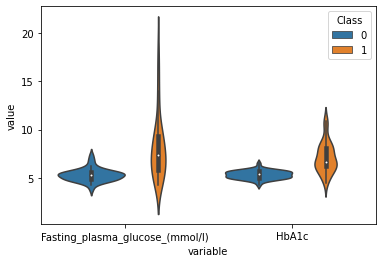

In [86]:
sns.violinplot(data=plot_df,x="variable",y="value",hue="Class")

## beeswarm plot

<AxesSubplot:xlabel='variable', ylabel='value'>

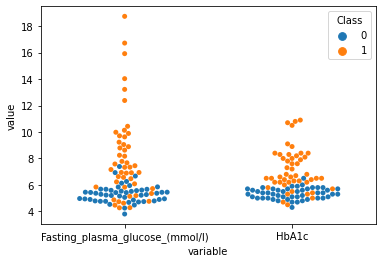

In [89]:
sns.swarmplot(data=plot_df,x="variable",y="value",hue="Class")

<AxesSubplot:xlabel='variable', ylabel='value'>

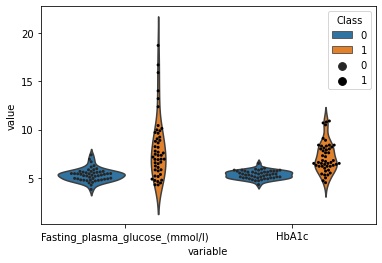

In [100]:
sns.violinplot(data=plot_df,x="variable",y="value",hue="Class",inner=None)
sns.swarmplot(data=plot_df,x="variable",y="value",hue="Class",dodge=True,color="black",s=3)


<AxesSubplot:xlabel='variable', ylabel='value'>

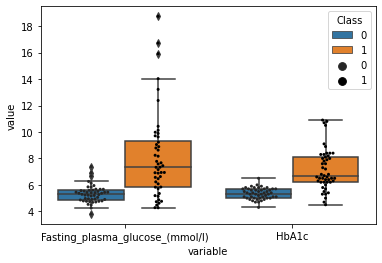

In [101]:
sns.boxplot(data=plot_df,x="variable",y="value",hue="Class")
sns.swarmplot(data=plot_df,x="variable",y="value",hue="Class",dodge=True,color="black",s=3)


In [102]:
df.head()

,SampleID,Peptide_27,Fasting_plasma_glucose_(mmol/l),HbA1c,Fasting_plasma_insulin_(pmol/l),C-Peptide_(nmol/l),HOMA-IR,Free_fatty_acids_(mmol/l),Class
0,3,10.42,4.73,6.5,121.4,1.63,3.7,1.03,1
1,5,102.86,7.16,7.6,226.0,1.11,10.4,0.98,1
2,6,9.84,5.06,4.9,39.7,0.75,1.3,0.35,0
3,7,41.03,5.35,6.3,203.3,2.02,7.0,1.17,1
4,8,12.30,5.37,5.6,50.8,1.19,1.7,0.32,0


## Exercise

### Can we still use the same HbA1c and Peptide27 cutoff for the second data?

In [160]:
df2.columns

Index(['Sample ID', 'Peptide 1', 'Peptide 2', 'Peptide 3', 'Peptide 4',
       'Peptide 5', 'Peptide 6', 'Peptide 7', 'Peptide 8', 'Peptide 9',
       'Peptide 10', 'Peptide 11', 'Peptide 12', 'Peptide 13', 'Peptide 14',
       'Peptide 15', 'Peptide 16', 'Peptide 17', 'Peptide 18', 'Peptide 21',
       'Peptide 22', 'Peptide 23', 'Peptide 24', 'Peptide 25', 'Peptide 26',
       'Peptide 27', 'Peptide 29', 'Peptide 30', 'Age', 'Diagnosis', 'BMI',
       'HbA1c (%)', 'Gender', 'Height', 'Body weight', 'BMI.1', 'Body fat',
       'Fat free mass', 'Waist', 'Hip', 'WHR', 'Hemoglobin', 'Erythrozyten',
       'Thrombozyten', 'Leukocytes', 'ALAT', 'ASAT', 'gGT',
       'Fasting plasma glucose (mmol/l)', 'Fasting plasma insulin (pmol/l)',
       'C-Peptide (nmol/l)', 'Proinsulin (pmol/l)', 'Creatinin',
       'Triglycerides (mmol/l)', 'Cholesterol total (mmol/l)',
       'HDL-Cholesterol (mmol/l)', 'LDL-Cholesterol (mmol/l)',
       'Proteins total (g/l)', 'Albumin (g/l)', 'TSH (mU/l)', 'fT3 (

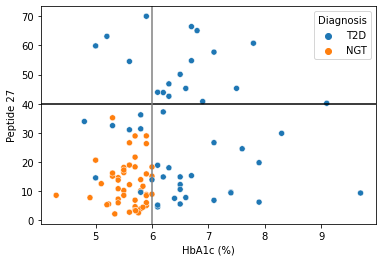

In [161]:
sns.scatterplot(data = df2,x="HbA1c (%)",y="Peptide 27",hue="Diagnosis")
plt.axhline(40,color="black")
plt.axvline(6,color="grey")

### what is the data distribution for each feature?

In [179]:
df2.head()

,Sample ID,Peptide 1,Peptide 2,Peptide 3,Peptide 4,Peptide 5,Peptide 6,Peptide 7,Peptide 8,Peptide 9,...,TSH (mU/l),fT3 (pmol/l),fT4 (pmol/l),Cortisol (nmol/l),Testosteron (nmol/l),HOMA-IR,Free fatty acids (mmol/l),RRsys (mmHg),RR dia (mmHg),ssCRP (mg/dl)
0,sample 2,33.58,7.18,9.35,3.57,94.44,14.91,153.05,35.52,9.76,...,0.72,5.23,21.5,NaN,NaN,7.2,0.30,NaN,NaN,0.48
1,sample 3,37.57,8.70,10.79,3.36,94.11,15.99,198.88,39.65,8.62,...,0.97,NaN,NaN,NaN,NaN,9.3,1.04,NaN,NaN,7.15
2,sample 4,27.31,5.42,5.64,2.75,67.01,11.91,148.32,28.90,5.64,...,1.02,5.01,17.6,NaN,NaN,9.1,0.37,NaN,NaN,NaN
3,sample 5,29.09,5.81,4.69,3.61,65.99,12.42,154.55,26.48,6.38,...,1.00,4.61,15.7,NaN,NaN,24.5,0.99,168.0,95.0,0.20
4,sample 6,41.13,8.40,8.85,3.56,109.13,17.60,209.62,44.35,10.43,...,1.30,5.43,19.2,NaN,NaN,11.1,0.54,165.0,84.0,0.30


<ipython-input-200-795c994e6a81>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 288x144 with 0 Axes>

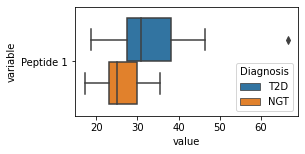

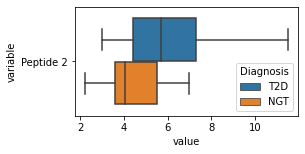

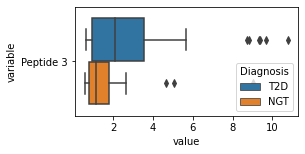

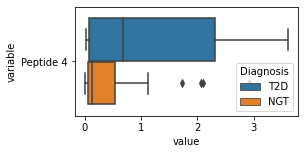

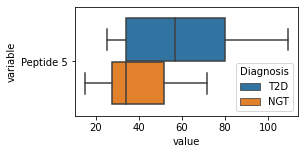

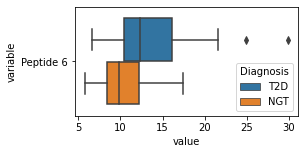

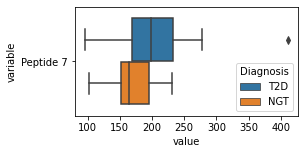

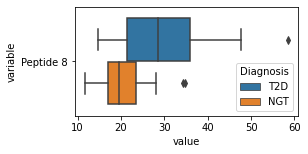

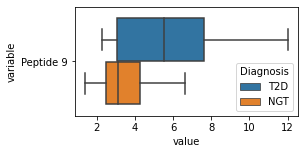

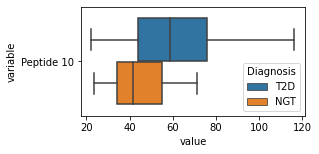

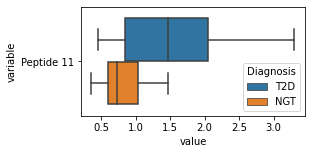

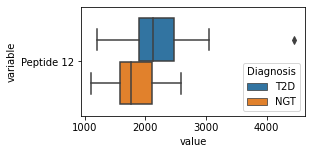

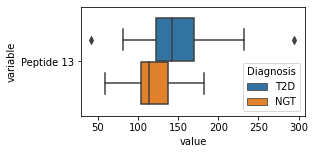

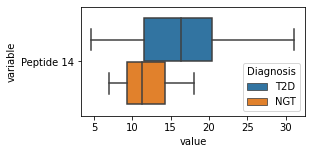

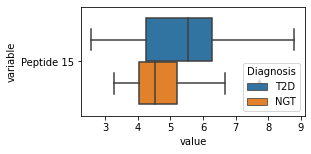

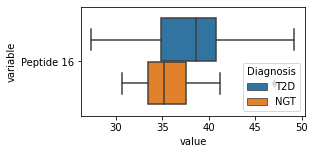

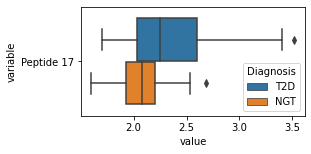

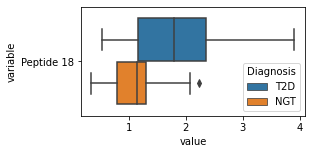

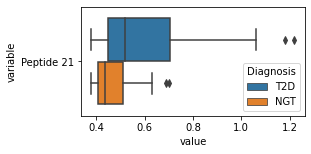

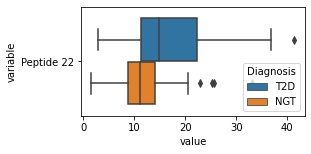

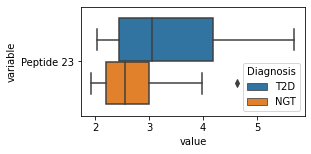

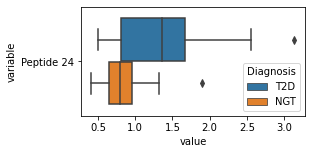

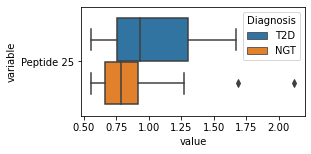

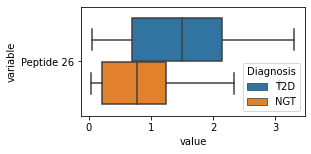

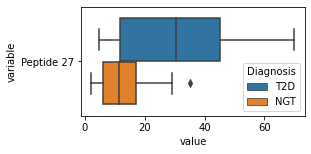

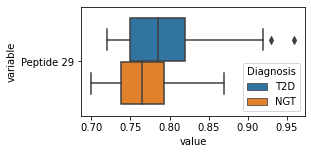

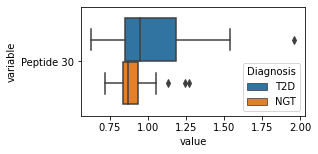

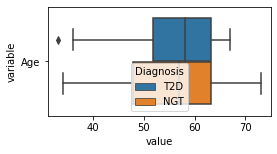

<Figure size 288x144 with 0 Axes>

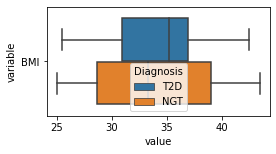

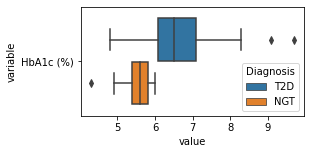

<Figure size 288x144 with 0 Axes>

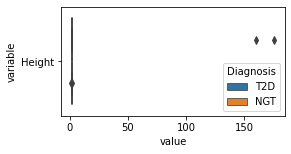

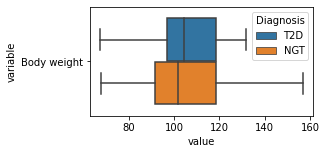

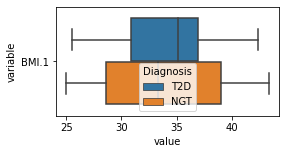

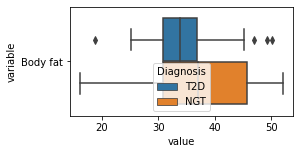

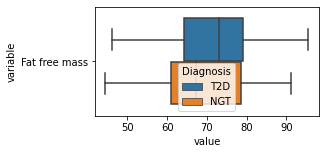

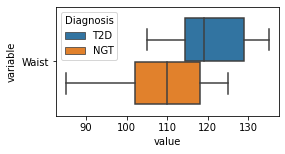

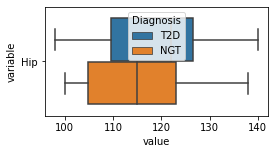

<Figure size 288x144 with 0 Axes>

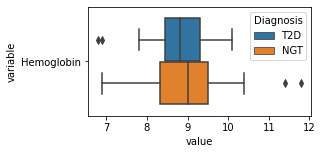

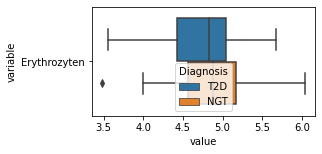

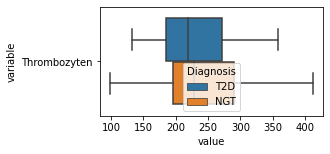

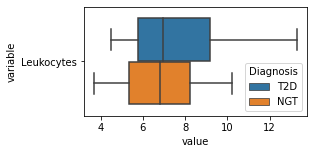

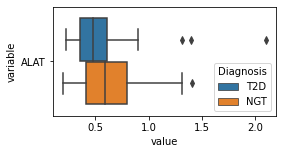

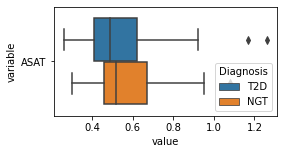

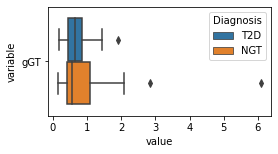

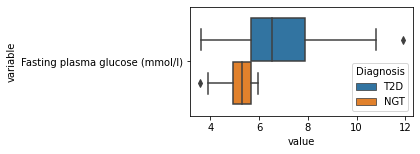

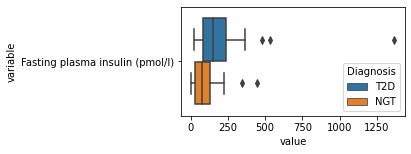

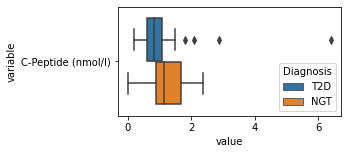

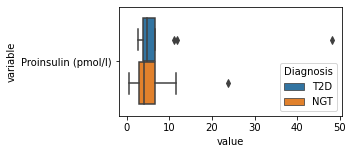

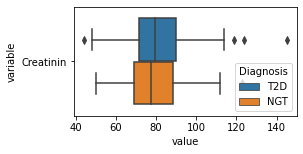

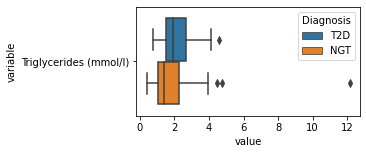

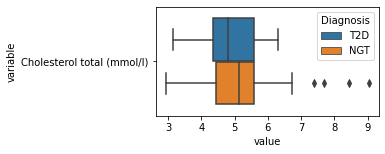

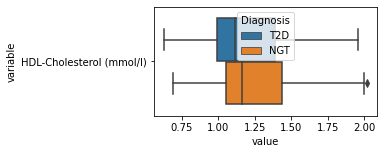

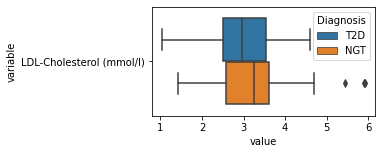

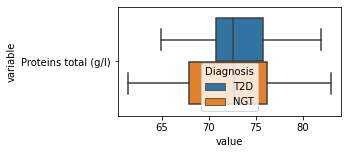

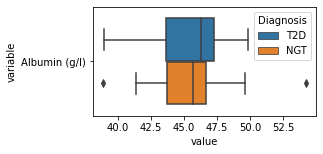

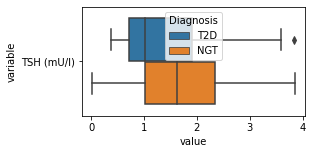

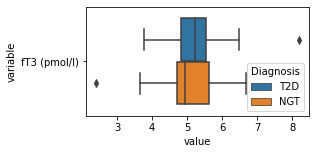

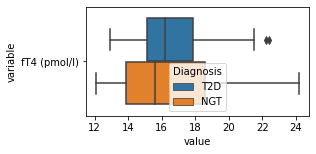

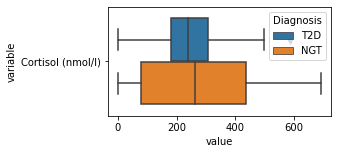

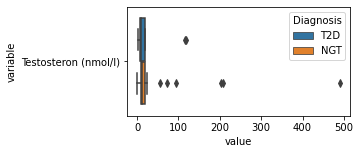

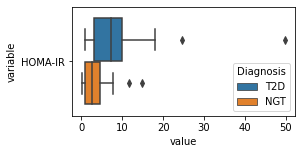

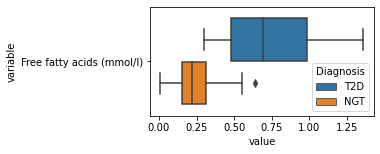

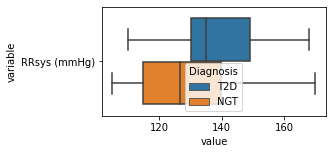

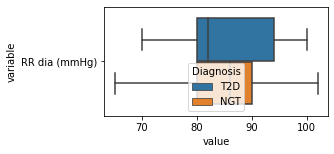

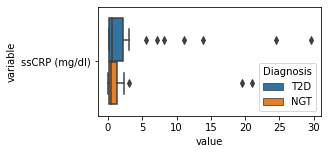

In [200]:
for c in df2.columns:
    try:
        plt.figure(figsize=(4,2))
        tmp = df2.melt(id_vars=['Diagnosis'],value_vars=c)
        sns.boxplot(data=tmp,y="variable",x="value",hue="Diagnosis")
    except:
        continue